# 📊 Diabetes Dataset – Exploratory Data Analysis

**Author:** Justin D. Landes
**Date:** 26 June 2025  
**Dataset Source:** [Kaggle - Pima Indians Diabetes](https://www.kaggle.com/datasets/uciml/pima-indians-diabetes-database)

This notebook explores the Pima Indians Diabetes dataset to understand feature behavior, clean invalid values, and identify meaningful predictors for diabetes classification.

**References:**
* Kaggle.com, Pima Indians Diabetes Database (Mountain View, CA). Retrieved June 25, 2025 from https://www.kaggle.com/datasets/uciml/pima-indians-diabetes-database. 

* Smith, J.W., Everhart, J.E., Dickson, W.C., Knowler, W.C., & Johannes, R.S. (1988). Using the ADAP learning algorithm to forecast the onset of diabetes mellitus. In Proceedings of the Symposium on Computer Applications and Medical Care (pp. 261--265). IEEE Computer Society Press.

## Step 1: Load Tools and Dataset

Import the Python 3 libraries requried for data analysis (Pandas) and visualization via plotting (Matplotlib and Seaborn).  Additionally, load the raw dataset and review the first 5 lines to gain familiarity with the data fields and data points represented in the table.


In [6]:
# Import libraries for data analysis and visualization plotting
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Set the option to allow all columns in a DataFrame to be displayed without truncation
pd.set_option('display.max_columns', None)

# Display plots inline in the notebook
%matplotlib inline

# Set Seaborn default style
sns.set(style="whitegrid")

# Load the raw Diabetes Dataset
df = pd.read_csv('../data/raw/diabetes.csv')

# Show the first 5 rows of data
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


## Step 2: High-Level Review of Dataset

Execute a high-level overview of the dataset, using the Pandas library, to determine key characteristics:
a. The dataframe .info() method presents total number of records, columns by total count and title, and the data types in the dataset.
b. The dataframe .describe() method identifies the count of non-null observations, the minimum and maximum, the mean and standard deviation, and the percentiles (25%, 50%, 75%) for the data in each column. 
c. The dataframe .isnull().sum() method/function returns the number of missing values in the dataset.
d. NOTE - Not a Number (NaN) results may occur, but remember that zero values in certain columns (Glucose, BloodPressure, BMI) are medically and/or biologically invalid, so these will be treated as missing values at a later step in the analysis.


### 📊 Data Summary 2A: Shape of Dataset, and Basic Column Information

In [7]:
# Review the basic information about the Dataset
print("Dataset shape:", df.shape)
df.info()

Dataset shape: (768, 9)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


### 📊 Data Summary 2B: Descriptive Statistics

In [8]:
# Review the statistical summary of the Dataset
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


### 📊 Data Summary 2C: Check for Missing Values

In [9]:
# Check for missing values
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

## Step 3: Feature Distributions

Use the Seaborn .histplot() function to plot distributions for each feature excect the target 'Outcome', for a total of eight (8) graphs (one per Column of data).  This aids in spotting skewed data, detecting biologically impossible values (e.g., a value of zero for Glucose), finding abnormal outliers, and comparing the spread of data across features. Note that several of the plots reveal spikes at zero (0) in the data which will need to be addressed in following steps.

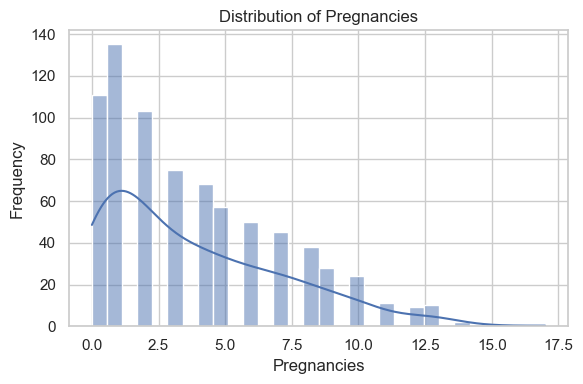

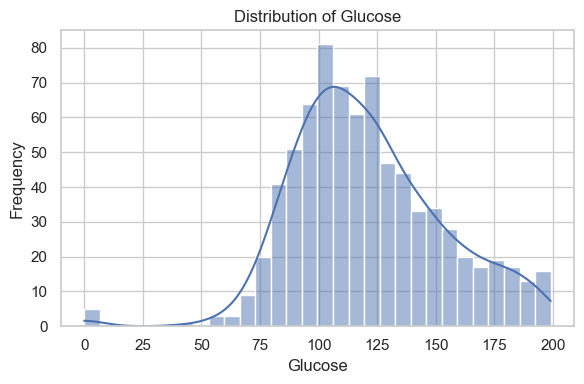

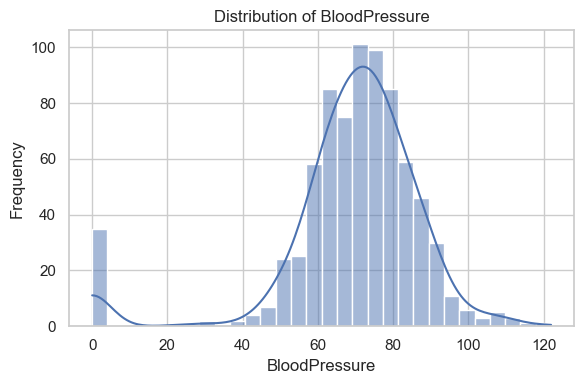

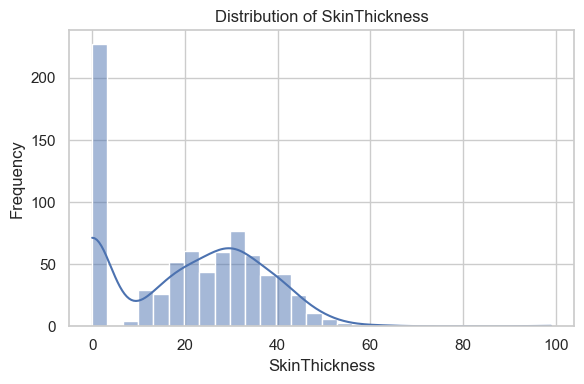

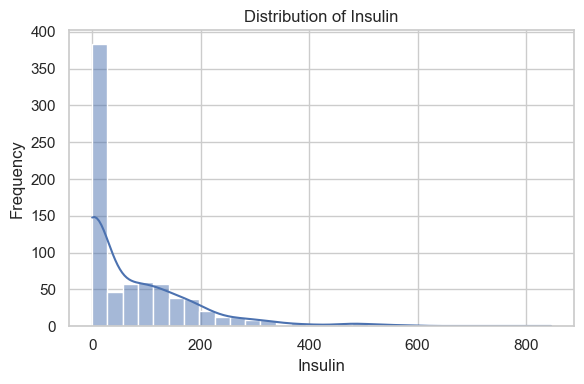

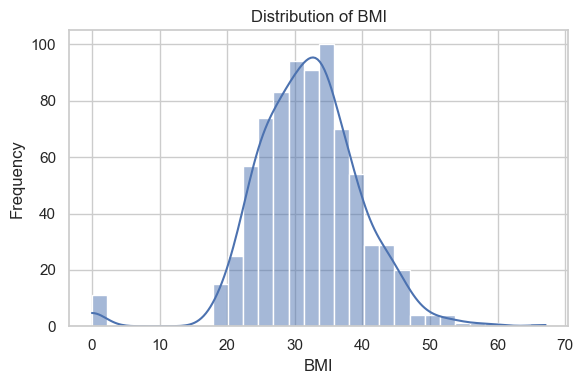

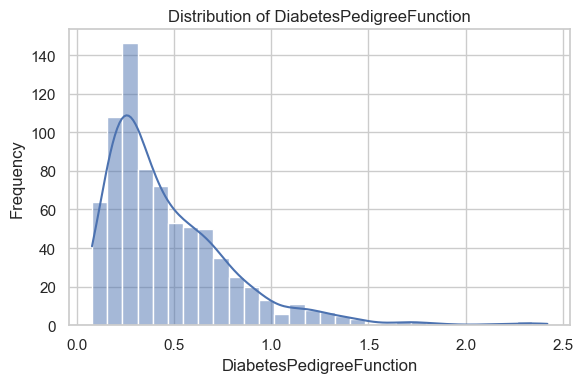

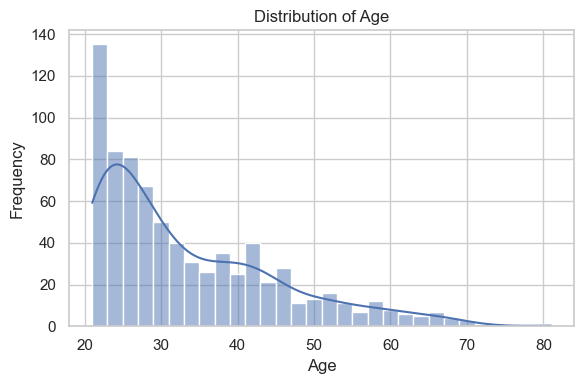

In [10]:
# Visualize distribution for each numeric feature (excluding Outcome)
numeric_features = df.columns[:-1]                    # All except 'Outcome'

for col in numeric_features:                          # Loops through each column
    fig, ax = plt.subplots(figsize=(6, 4))            # Sets the size of the graph in inches (width, height)
    sns.histplot(df[col], kde=True, bins=30, ax=ax)   # Uses Kernel Density Estimation (KDE) to smooth the curve of data distribution
    ax.set_title(f'Distribution of {col}')            # Sets the Title for the graph
    ax.set_xlabel(col)                                # Sets the X axis to the Column Name
    ax.set_ylabel('Frequency')                        # Sets the Y axis to the frequency of data
    fig.set_layout_engine("tight")                    # Implements the Tight plot geometry, replaces deprecated tight_layout()
    plt.show()                                        # Displays the generated plots

## Step 4: Data Cleaning

Address the presence of the invalid zero (0) values in these features: Glucose, BloodPressure, SkinThickness, Insulin, and BMI.  As noted, these are medically and/or biologically impossible numbers.  Therefore, these zeros will be treated as missing values (np.nan).

In [11]:
# Import the NumPy library for advanced mathematical operations
import numpy as np

# Identify the features where 0 is invalid
invalid_zero_features = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']

# Replace 0 with np.nan for each of those occurances
df[invalid_zero_features] = df[invalid_zero_features].replace(0, np.nan)

# Count the missing values (NaN) in each of the 5 columns
df[invalid_zero_features].isnull().sum()

Glucose            5
BloodPressure     35
SkinThickness    227
Insulin          374
BMI               11
dtype: int64

## Step 5: Impute Missing Values

Decide how to handle the NaNs identified in Step 4, using one of five options:
* Mean - replace each NaN with the column's average; this is simple, fast, and preserves the full dataset, but reveals sensitivity to outliers and may distort skewed data.
* Median - replace each NaN with the column's median value; more robust versus outliers and skews, but may lose data variation and underrepresent extremes.
* Mode - replace the most common value; useful for categorical variables, but not useful for continuous data.
* Model-Based - predict the missing value using other features (e.g., regression); more accurate if well-modeled, but more complex with a risk of data leakage and harder to validate.
* Drop - simply remove the rows from the dataset if the number is statistically insignificant to the results.

### Best Practices per Feature:
Here are the likely best practices for the 5 features reviewed in Step 4, based on the data present and the number of NaNs identfied:
* Glucose - Median (skewed and important)
* BloodPressure - Median (often skewed)
* SkinThickness - Median or Model-Based (skewed and a significant number of zeros)
* Insulin - Model-Based or Median (very skewed and a significant number of zeros)
* BMI - Mean or Median (plot shape supports either approach)

### Impute Decision:
Decided to use the Median Imputation for this analysis, as it is roboust, rapid, and avoids damage to skewed data.
NOTE - Model-Based could be used to perform a more complex imputation in the future, but requires a predictive model to be built first.

In [12]:
# Impute missing values using median
for col in invalid_zero_features:                                        # Loops through the columns with invalid zeros
    median_val = df[col].median()                                        # Returns the median value of the column
    df[col] = df[col].fillna(median_val)                                 # Replaces NaN values in the column's data
    print(f"{col}: filled missing values with median = {median_val}")    # Prints confirmation of action and the median used

Glucose: filled missing values with median = 117.0
BloodPressure: filled missing values with median = 72.0
SkinThickness: filled missing values with median = 29.0
Insulin: filled missing values with median = 125.0
BMI: filled missing values with median = 32.3


### Confirm Missing Values are Addressed

Execute a check to ensure all missing values have been addressed after imputation.

In [13]:
# Final check for missing values after median imputation
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

## Step 6: Re-Plot Cleaned Feature Distributions

Now that all missing values have been imputed, it is important to re-visualize the distributions for the affected features.  This confirms that zero-value spikes are resolved, offers the opportunity to ensure all distributions present in a realistic manner, and detects any lingering issues in the data.

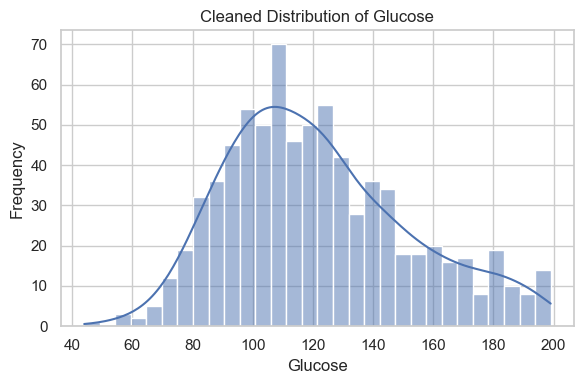

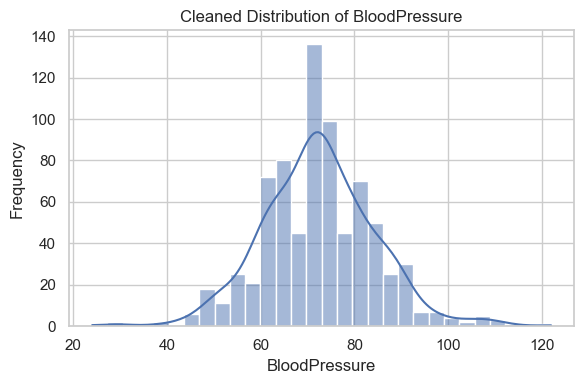

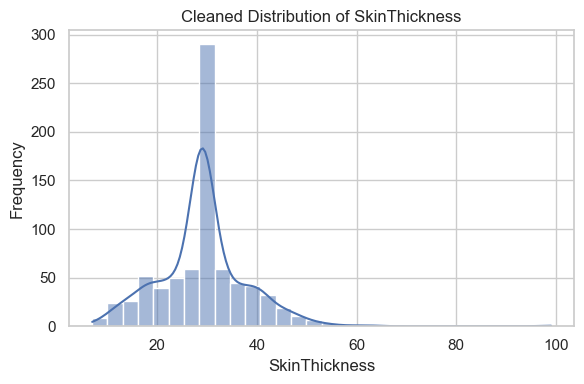

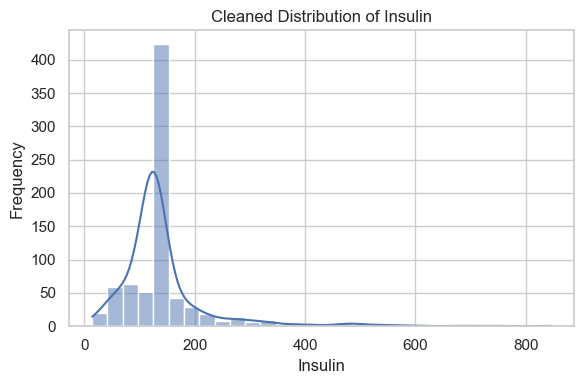

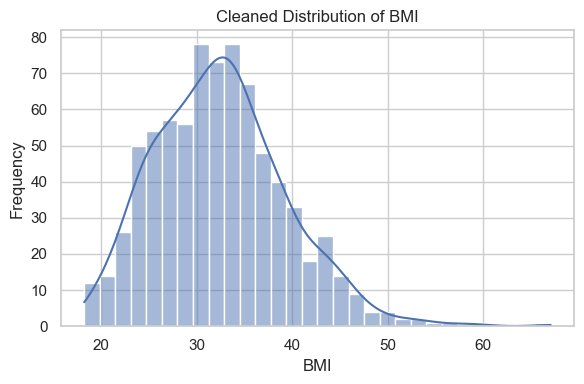

In [14]:
# Re-plot cleaned distributions for affected features
cleaned_features = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']

for col in cleaned_features:                          # Loops through each of the 5 cleaned columns
    fig, ax = plt.subplots(figsize=(6, 4))            # Sets the size of the graph in inches (width, height)
    sns.histplot(df[col], kde=True, bins=30, ax=ax)   # Uses KDE to smooth the curve of data distribution
    ax.set_title(f'Cleaned Distribution of {col}')    # Sets the Title for the graph
    ax.set_xlabel(col)                                # Sets the X axis to the Column Name
    ax.set_ylabel('Frequency')                        # Sets the Y axis to the frequency of data
    fig.set_layout_engine("tight")                    # Implements the Tight plot geometry, replaces deprecated tight_layout()
    plt.show()                                        # Displays the generated plots                                  

## Step 7: Correlation Heatmap

The correlation heatmap reveals how strongly features are related to one antoher and to the 'Outcome' (the target label for the presence of diabetes).

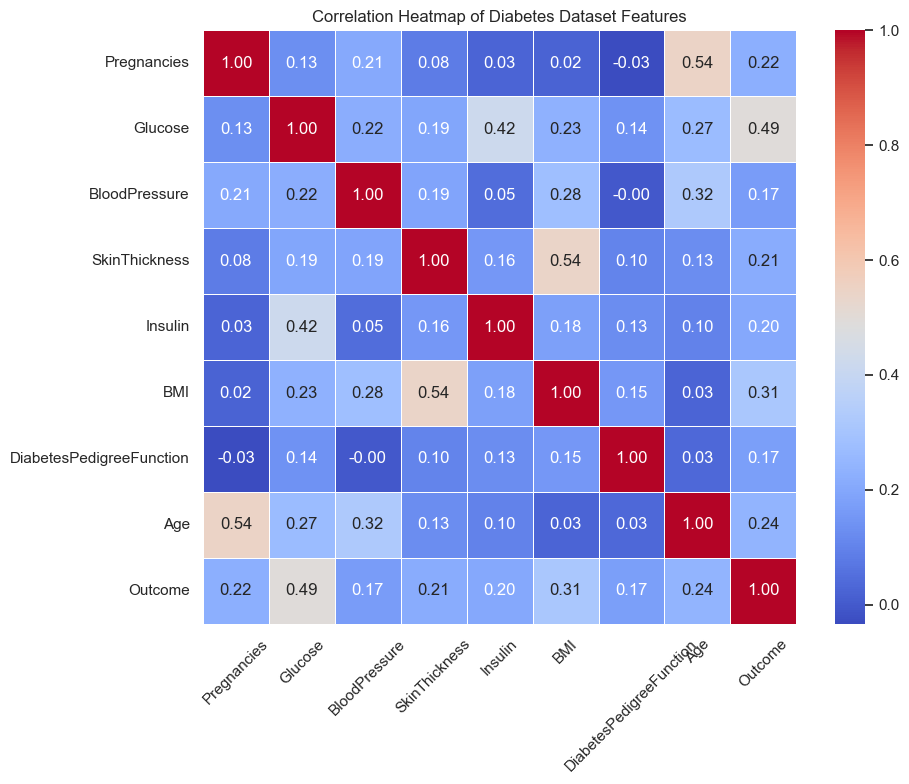

In [15]:
# Generate correlation matrix using the Pandas df.corr() method
# Computes pairwise correlation of columns, excluding NA or null values
corr_matrix = df.corr()

# Create heatmap plot
fig, ax = plt.subplots(figsize=(10, 8))                               # Sets the size of the graph in inches (width, height)
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', square=True,    # Seaborn creates the heatmap
            linewidths=0.5, fmt=".2f", ax=ax)
ax.set_title('Correlation Heatmap of Diabetes Dataset Features')      # Sets title
ax.tick_params(axis='x', rotation=45)                                 # Sets X axis labels using column names, presented in 45-degree slant
ax.tick_params(axis='y', rotation=0)                                  # Sets Y axis labels using column names
fig.set_layout_engine("tight")                                        # Implements the Tight plot geometry, replaces deprecated tight_layout()
plt.show()                                                            # Displays the generated heatmap

## Step 8: Visualize Feature Distributions by Outcome

This step focused on visualizing insights from the data.  Use Seaborn's .boxplot() and .violinplot() methods to provide a side-by-side graph for each feature, which collectively demonstrate how the values of each feature vary between an Outcome = 0 (non-diabetic) and an Outcome = 1 (diabetic).  Features with visibly different distributions across the two groups are likely to be important predictors.  Key points of interpretation:
* If the median lines (box) or the shape of the violin different noticeably between outcomes, that feature is likely informative.
* The Glucose feature shows the most seperation.
* The BMI, Age, and Pregnancies features also have a clear spread in the correlation of the data.

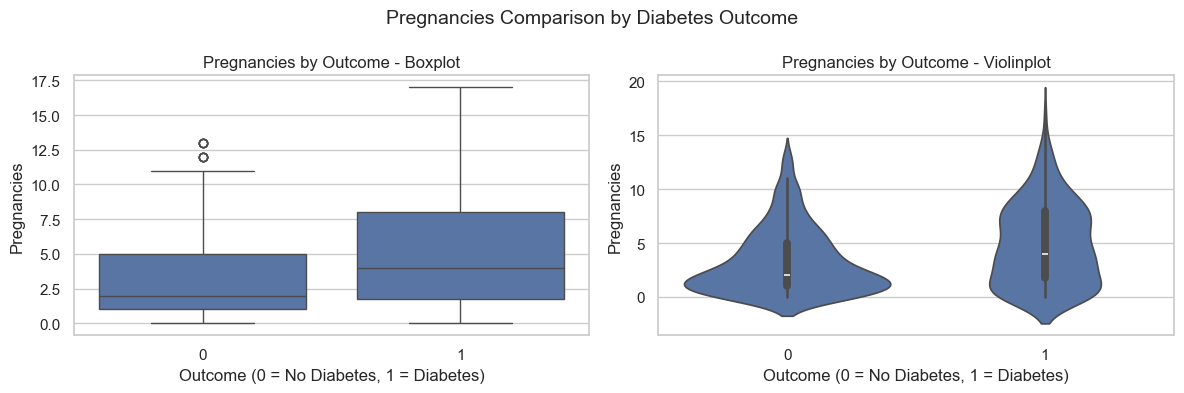

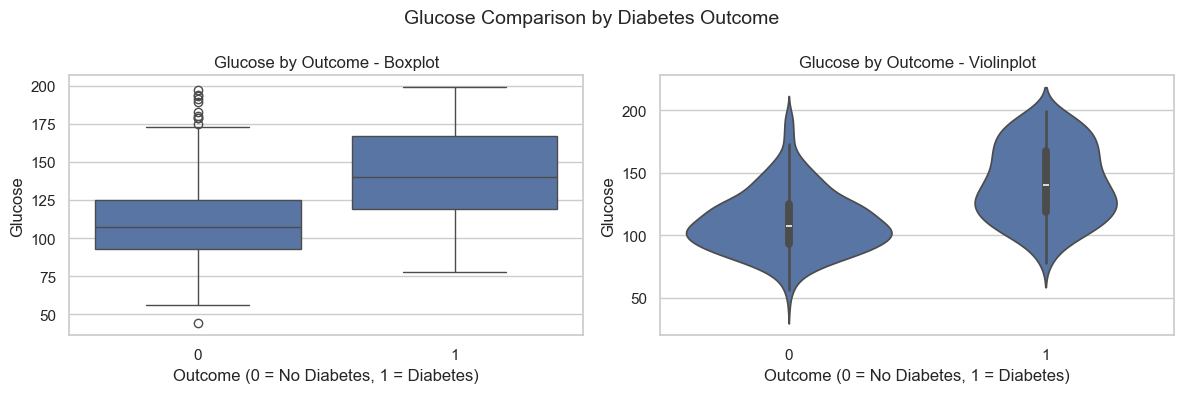

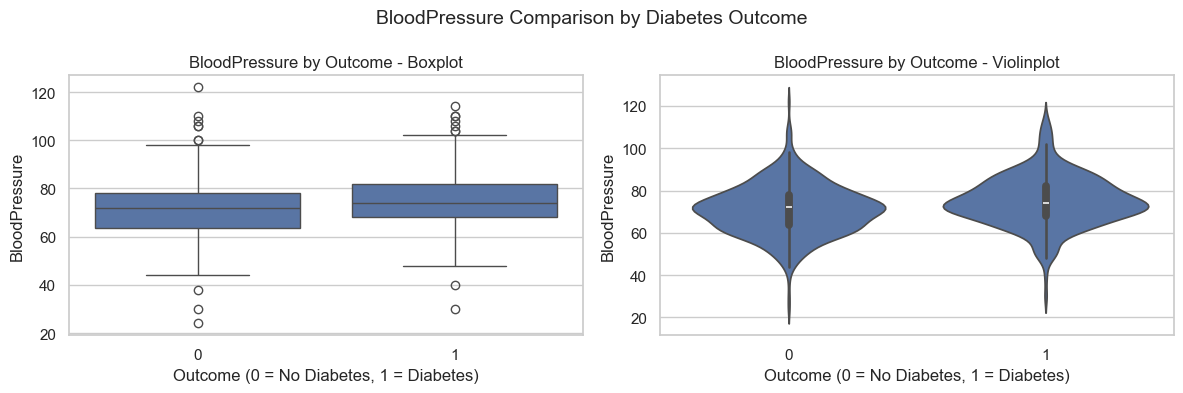

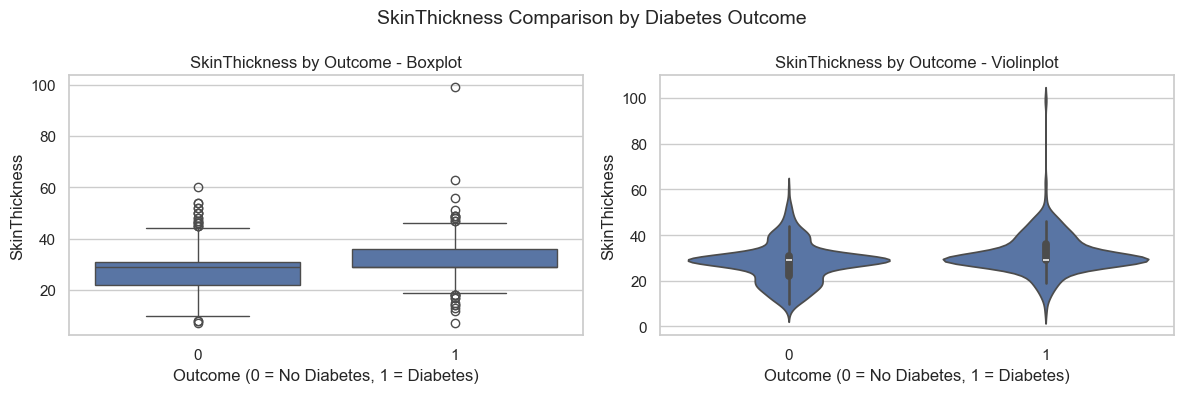

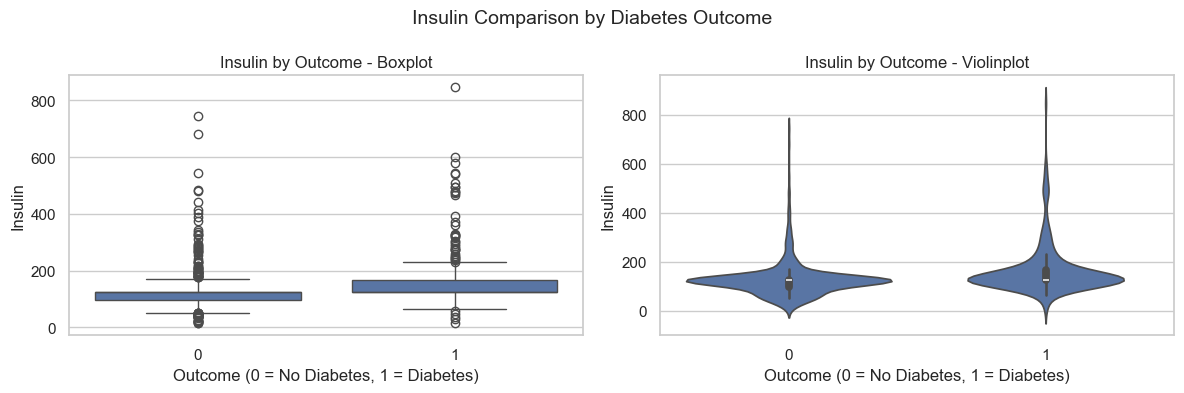

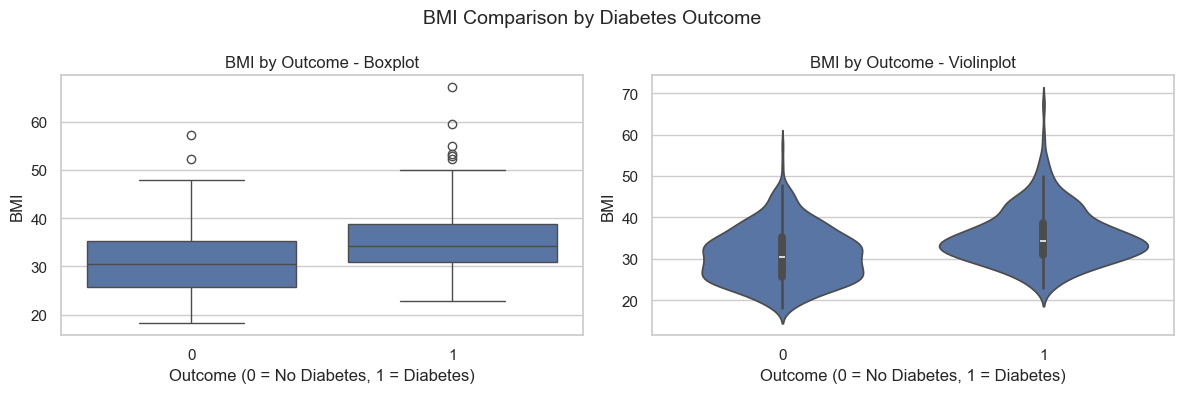

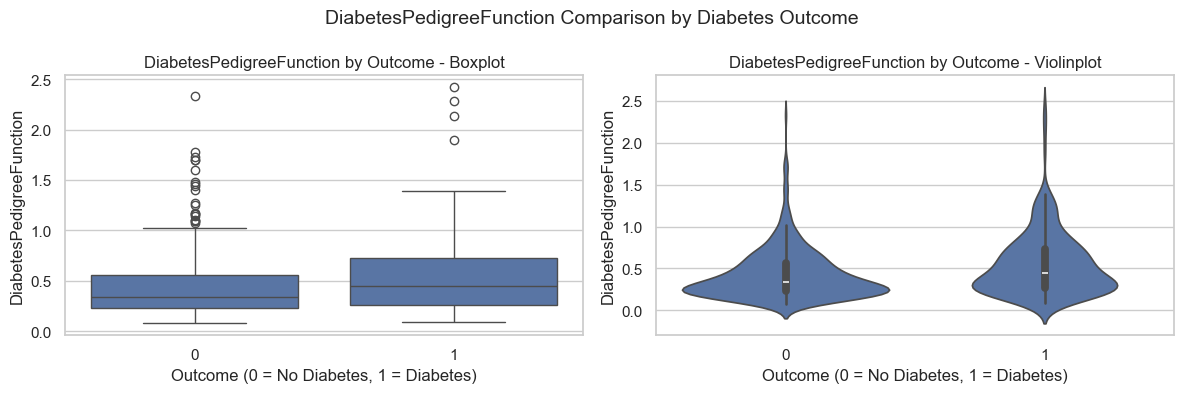

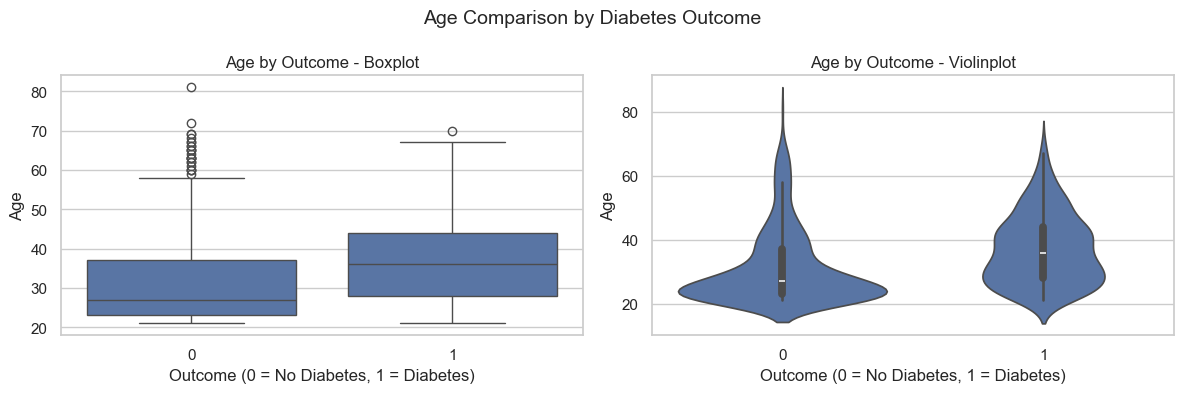

In [16]:
# Features to compare (excluding Outcome)
features_to_compare = df.columns[:-1]

for col in features_to_compare:                                          # Loops through each feature by column
    fig, axes = plt.subplots(1, 2, figsize=(12, 4))                      # Sets the size of the graphcs and axes
    sns.boxplot(x='Outcome', y=col, data=df, ax=axes[0])                 # Initiates the boxplot
    axes[0].set_title(f'{col} by Outcome - Boxplot')                     # Sets the title of the boxplot
    sns.violinplot(x='Outcome', y=col, data=df, ax=axes[1])              # Initiates the violinplot
    axes[1].set_title(f'{col} by Outcome - Violinplot')                  # Sets the title of the violinplot
    for ax in axes:                                                      # Loops through the X and Y axis for each graph
        ax.set_xlabel('Outcome (0 = No Diabetes, 1 = Diabetes)')         # Sets the X axis label based on Outcome
        ax.set_ylabel(col)                                               # Sets the Y axix label based on column name
    fig.suptitle(f'{col} Comparison by Diabetes Outcome', fontsize=14)   # Creates a centered supertitle for the figure
    fig.set_layout_engine("tight")                                       # Implements the Tight plot geometry
    plt.show()                                                           # Displays the generated plot

## Step 9: Summary of Key Insights

The following observations are made as a result of the exploratory analysis of the Pima Indians Diabetes dataset:

A. Data Cleaning:
* Several critical features (**Glucose, BloodPressure, SkinThickness, Insulin,** and **BMI**) contained invalid zero values.
* These were replaced with NaNs and imputed using the median value to ensure statistical integrity.

B. Feature Distributions:
* **Glucose** and **BMI** are positively skewed but showed good separation between diabetic and non-diabetic groups.
* **Insulin** had extreme outliers and required careful interpretation due to high variance.

C. Correlation Analysis:
* **Glucose** showed the strongest positive correlation with diabetes outcome (~0.49).
* **BMI, Age,** and **Pregnancies** had moderate correlations and may serve as meaningful predictors.
* **BloodPressure, SkinThickness,** and **Insulin** had weak or inconsistent relationships with Outcome.

D. Outcome Comparison:
* Diabetic individuals generally have **higher glucose, BMI, insulin,** and **age**.
* Feature distributions between diabetic and non-diabetic groups showed meaningful differences in shape and spread.

### Next Steps
This cleaned and analyzed dataset is now ready for follow-on activities such as:
* Feature engineering
* Model training and evaluation
* Further statistical testing or domain-specific validation

## Step 10: Save the Cleaned Dataset

The cleaned and imputed dataset is saved into the Processed data folder as "diabetes_clean.csv" to support follow-on activities.

In [17]:
# Save the cleaned and imputed dataset
df.to_csv('../data/processed/diabetes_clean.csv', index=False)

# Print confirmation of the file save
print("Cleaned data saved to: ../data/processed/diabetes_clean.csv")

Cleaned data saved to: ../data/processed/diabetes_clean.csv


**// END OF REPORT //**
* PREPARED BY: Justin D. Landes
* PUBLICATION DATE: 26 June 2025
* PUBLISHED TO: https://github.com/Justin-Landes/Diabetes-Data-EDA-Notebook